# Spectral Clustering
BAIM Mohamed Jalal, 3113551810

In [1]:
# Libraries 
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import imageio
import os

In [2]:
output_path ='./Spectral_Clustering_viz'

In [3]:
# process to GIF
def create_gif(name, output_dir,k,initialize, max_iter):
    """
    Create a GIF from the saved clustering images.
    Args:
        output_dir (str): Directory where images are saved.
        max_iter (int): Total number of iterations visualized.
    """
    images = []
    output_dir = os.path.join(output_dir, name)
    for i in range(max_iter + 1):
        filename = os.path.join(output_dir, f'nb_cluster{k}_iteration_{i}_init_{initialize}.png')
        images.append(imageio.imread(filename))
    gif_filename = os.path.join(output_dir, f'clustering_nb_cluster{k}_iteration_{i}_init_{initialize}.gif')
    imageio.mimsave(gif_filename, images, duration=0.5)
    print(f"GIF saved at {gif_filename}")

def save_iteration_visualization(name, img_shape, clusters, k, iteration, initialize,output_dir):
    """
    Save the cluster assignment visualization for the current iteration.
    Args:
        img_shape (tuple): Shape of the original image (height, width, channels).
        clusters (numpy.ndarray): Cluster assignments for each pixel.
        k (int): Number of clusters.
        iteration (int): Current iteration number.
        output_dir (str): Directory to save the images.
    """
    output_dir = os.path.join(output_dir, name)
    H, W, _ = img_shape
    cluster_image = clusters.reshape(H, W)
    plt.figure(figsize=(8, 6))
    plt.imshow(cluster_image, cmap='tab20', interpolation='nearest')
    plt.title(f'Iteration {iteration}')
    plt.axis('off')
    filename = os.path.join(output_dir, f'nb_cluster{k}_iteration_{iteration}_init_{initialize}.png')
    plt.savefig(filename, bbox_inches='tight')
    plt.close()

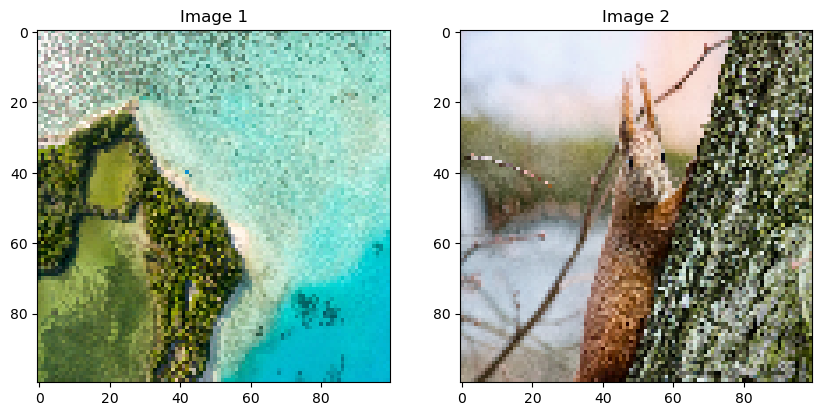

In [4]:
# data : 2 images 
path_img1 = "../image1.png"
path_img2 = "../image2.png"

img1 = cv2.imread(path_img1)
img2 = cv2.imread(path_img2)

# visualisation
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image 1")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title("Image 2")
plt.show()

In [5]:
def kernel(img, gamma_s, gamma_c):
    """
    Compute the Gram matrix using a combined spatial and color Gaussian kernel.

    Parameters:
    img (numpy.ndarray): The input image data of shape (H, W, C).
    gamma_s (float): The hyper-parameter for spatial similarity.
    gamma_c (float): The hyper-parameter for color similarity.

    Returns:
    numpy.ndarray: The Gram matrix computed using the combined kernel function.
    """
    H, W, C = img.shape
    n_pixels = H * W
    img_flat = img.reshape(-1, C)  # Shape: (n_pixels, C)

    # Coordinates
    x_coords = np.arange(W)
    y_coords = np.arange(H)
    x_grid, y_grid = np.meshgrid(x_coords, y_coords)
    spatial_coords = np.stack((x_grid, y_grid), axis=-1).reshape(-1, 2)  # Shape: (n_pixels, 2)

    # Scale features
    spatial_features = gamma_s * spatial_coords  # Shape: (n_pixels, 2)
    color_features = gamma_c * img_flat  # Shape: (n_pixels, C)

    # Combine features
    features = np.concatenate((spatial_features, color_features), axis=1)  # Shape: (n_pixels, 2 + C)
    sq_dists = np.sum((features[:, np.newaxis, :] - features[np.newaxis, :, :]) ** 2, axis=-1)  # Shape: (n_pixels, n_pixels)
    gram = np.exp(-sq_dists)

    return gram
